In [1]:
%pwd

'C:\\Users\\Admin\\capstone projects'

In [7]:
%cd C:\Users\Admin\capstone projects\walmart store prediction - forecasting\data

C:\Users\Admin\capstone projects\walmart store prediction - forecasting\data


In [8]:
import pandas as pd
import numpy as np
import datetime as dt

# Importing features table & data cleaning

In [12]:
dateparse = lambda Date: pd.datetime.strptime(Date, '%Y-%m-%d')
features = pd.read_csv('features.csv', parse_dates=['Date'], index_col='Date',date_parser=dateparse)
features.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_19884\8143450.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  dateparse = lambda Date: pd.datetime.strptime(Date, '%Y-%m-%d')


,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
Date,,,,,,,,,,,
2010-02-05,1,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
2010-02-12,1,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2010-02-19,1,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
2010-02-26,1,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
2010-03-05,1,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [13]:
features.reset_index(inplace = True)

In [14]:
features.head()

,Date,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,2010-02-05,1,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,2010-02-12,1,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,2010-02-19,1,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,2010-02-26,1,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,2010-03-05,1,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [15]:
features['Date_new']=features['Date'].astype(str)
features['Store']=features['Store'].astype(str)

In [16]:
features['Date_new']=features['Store']+'_'+features['Date_new']

In [17]:
features['MarkDown1']=features['MarkDown1'].replace(np.NaN,0)
features['MarkDown2']=features['MarkDown2'].replace(np.NaN,0)
features['MarkDown3']=features['MarkDown3'].replace(np.NaN,0)
features['MarkDown4']=features['MarkDown4'].replace(np.NaN,0)
features['MarkDown5']=features['MarkDown5'].replace(np.NaN,0)

In [18]:
features.shape

(8190, 13)

# importing Stores table and data cleaning

In [19]:
stores = pd.read_csv('stores.csv')
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


# import train table and data cleaning

In [21]:
dateparse = lambda Date: pd.datetime.strptime(Date, '%Y-%m-%d')
train = pd.read_csv('train.csv', parse_dates=['Date'], index_col='Date',date_parser=dateparse)
train.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_19884\3182825527.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  dateparse = lambda Date: pd.datetime.strptime(Date, '%Y-%m-%d')


,Store,Dept,Weekly_Sales,IsHoliday
Date,,,,
2010-02-05,1,1,24924.50,False
2010-02-12,1,1,46039.49,True
2010-02-19,1,1,41595.55,False
2010-02-26,1,1,19403.54,False
2010-03-05,1,1,21827.90,False


In [22]:
train.reset_index(inplace = True)

In [23]:
train.columns

Index(['Date', 'Store', 'Dept', 'Weekly_Sales', 'IsHoliday'], dtype='object')

In [24]:
train['Date_new']=train['Date'].astype(str)
train['Store']=train['Store'].astype(str)
train['Date_new']=train['Store']+'_'+train['Date_new']

In [25]:
train_new = train[['Date_new','Weekly_Sales']].groupby(['Date_new']).sum()

In [26]:
train_new.reset_index(inplace=True)

In [27]:
train.head()

,Date,Store,Dept,Weekly_Sales,IsHoliday,Date_new
0,2010-02-05,1,1,24924.50,False,1_2010-02-05
1,2010-02-12,1,1,46039.49,True,1_2010-02-12
2,2010-02-19,1,1,41595.55,False,1_2010-02-19
3,2010-02-26,1,1,19403.54,False,1_2010-02-26
4,2010-03-05,1,1,21827.90,False,1_2010-03-05


In [28]:
train_new.head()

,Date_new,Weekly_Sales
0,10_2010-02-05,2193048.75
1,10_2010-02-12,2176028.52
2,10_2010-02-19,2113432.58
3,10_2010-02-26,2006774.96
4,10_2010-03-05,1987090.09


In [29]:
train =  pd.merge(train_new,train[train.columns.difference(['Weekly_Sales','Dept'])],left_on = 'Date_new',right_on = 'Date_new',how = 'inner')

In [30]:
train.head()

,Date_new,Weekly_Sales,Date,IsHoliday,Store
0,10_2010-02-05,2193048.75,2010-02-05,False,10
1,10_2010-02-05,2193048.75,2010-02-05,False,10
2,10_2010-02-05,2193048.75,2010-02-05,False,10
3,10_2010-02-05,2193048.75,2010-02-05,False,10
4,10_2010-02-05,2193048.75,2010-02-05,False,10


In [31]:
train = train[train.duplicated() == False]

In [32]:
train.shape

(6435, 5)

In [33]:
train.head()

,Date_new,Weekly_Sales,Date,IsHoliday,Store
0,10_2010-02-05,2193048.75,2010-02-05,False,10
75,10_2010-02-12,2176028.52,2010-02-12,True,10
149,10_2010-02-19,2113432.58,2010-02-19,False,10
224,10_2010-02-26,2006774.96,2010-02-26,False,10
300,10_2010-03-05,1987090.09,2010-03-05,False,10


In [34]:
train = pd.merge(train,features[features.columns.difference(['Date','Store','IsHoliday'])],left_on = 'Date_new',right_on = 'Date_new',how = 'left')

In [35]:
train.columns

Index(['Date_new', 'Weekly_Sales', 'Date', 'IsHoliday', 'Store', 'CPI',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'Temperature', 'Unemployment'],
      dtype='object')

In [36]:
train['Store']=train['Store'].astype('int64')

In [37]:
train = pd.merge(train,stores,left_on = 'Store',right_on = 'Store',how='left')

In [38]:
train.dtypes

Date_new                object
Weekly_Sales           float64
Date            datetime64[ns]
IsHoliday                 bool
Store                    int64
CPI                    float64
Fuel_Price             float64
MarkDown1              float64
MarkDown2              float64
MarkDown3              float64
MarkDown4              float64
MarkDown5              float64
Temperature            float64
Unemployment           float64
Type                    object
Size                     int64
dtype: object

In [39]:
train.shape

(6435, 16)

In [40]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6435 entries, 0 to 6434
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date_new      6435 non-null   object        
 1   Weekly_Sales  6435 non-null   float64       
 2   Date          6435 non-null   datetime64[ns]
 3   IsHoliday     6435 non-null   bool          
 4   Store         6435 non-null   int64         
 5   CPI           6435 non-null   float64       
 6   Fuel_Price    6435 non-null   float64       
 7   MarkDown1     6435 non-null   float64       
 8   MarkDown2     6435 non-null   float64       
 9   MarkDown3     6435 non-null   float64       
 10  MarkDown4     6435 non-null   float64       
 11  MarkDown5     6435 non-null   float64       
 12  Temperature   6435 non-null   float64       
 13  Unemployment  6435 non-null   float64       
 14  Type          6435 non-null   object        
 15  Size          6435 non-null   int64   

In [41]:
train['Store']=train['Store'].astype(str)

# import test data and data cleaning

In [44]:
dateparse = lambda Date: pd.datetime.strptime(Date, '%Y-%m-%d')
test = pd.read_csv('test.csv', parse_dates=['Date'], index_col='Date',date_parser=dateparse)
test.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_19884\2050470119.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  dateparse = lambda Date: pd.datetime.strptime(Date, '%Y-%m-%d')


,Store,Dept,IsHoliday
Date,,,
2012-11-02,1,1,False
2012-11-09,1,1,False
2012-11-16,1,1,False
2012-11-23,1,1,True
2012-11-30,1,1,False


In [45]:
test.reset_index(inplace=True)

In [46]:
test['Date_new']=test['Date'].astype(str)
test['Store']=test['Store'].astype(str)
test['Date_new']=test['Store']+'_'+test['Date_new']

In [47]:
test.head()

,Date,Store,Dept,IsHoliday,Date_new
0,2012-11-02,1,1,False,1_2012-11-02
1,2012-11-09,1,1,False,1_2012-11-09
2,2012-11-16,1,1,False,1_2012-11-16
3,2012-11-23,1,1,True,1_2012-11-23
4,2012-11-30,1,1,False,1_2012-11-30


In [48]:
test = pd.merge(test,features[features.columns.difference(['Date','Store','IsHoliday'])],left_on = 'Date_new',right_on = 'Date_new',how = 'left')

In [49]:
test.columns

Index(['Date', 'Store', 'Dept', 'IsHoliday', 'Date_new', 'CPI', 'Fuel_Price',
       'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5',
       'Temperature', 'Unemployment'],
      dtype='object')

In [50]:
test['Store']=test['Store'].astype('int64')

In [51]:
test = pd.merge(test,stores,left_on = 'Store',right_on = 'Store',how='left')

In [52]:
test.columns

Index(['Date', 'Store', 'Dept', 'IsHoliday', 'Date_new', 'CPI', 'Fuel_Price',
       'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5',
       'Temperature', 'Unemployment', 'Type', 'Size'],
      dtype='object')

In [53]:
test.shape

(115064, 16)

In [54]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115064 entries, 0 to 115063
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Date          115064 non-null  datetime64[ns]
 1   Store         115064 non-null  int64         
 2   Dept          115064 non-null  int64         
 3   IsHoliday     115064 non-null  bool          
 4   Date_new      115064 non-null  object        
 5   CPI           76902 non-null   float64       
 6   Fuel_Price    115064 non-null  float64       
 7   MarkDown1     115064 non-null  float64       
 8   MarkDown2     115064 non-null  float64       
 9   MarkDown3     115064 non-null  float64       
 10  MarkDown4     115064 non-null  float64       
 11  MarkDown5     115064 non-null  float64       
 12  Temperature   115064 non-null  float64       
 13  Unemployment  76902 non-null   float64       
 14  Type          115064 non-null  object        
 15  Size          115

In [55]:
test.drop(['Dept'],axis=1,inplace=True)

In [56]:
test.shape

(115064, 15)

In [57]:
test = test[test.duplicated() == False]

In [58]:
test.shape

(1755, 15)

In [59]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1755 entries, 0 to 112476
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          1755 non-null   datetime64[ns]
 1   Store         1755 non-null   int64         
 2   IsHoliday     1755 non-null   bool          
 3   Date_new      1755 non-null   object        
 4   CPI           1170 non-null   float64       
 5   Fuel_Price    1755 non-null   float64       
 6   MarkDown1     1755 non-null   float64       
 7   MarkDown2     1755 non-null   float64       
 8   MarkDown3     1755 non-null   float64       
 9   MarkDown4     1755 non-null   float64       
 10  MarkDown5     1755 non-null   float64       
 11  Temperature   1755 non-null   float64       
 12  Unemployment  1170 non-null   float64       
 13  Type          1755 non-null   object        
 14  Size          1755 non-null   int64         
dtypes: bool(1), datetime64[ns](1), float

In [60]:
test['CPI']=test['CPI'].replace('NA',0)
test['Unemployment']=test['Unemployment'].replace('NA',0)

In [61]:
test['Store'] = test['Store'].astype(str)

# Data Preparation of train data - Missing value,Handling Outliers, Handling Dummies

In [66]:
def missings_value(y):
    y=y.fillna(y.mean())
    return y
train._get_numeric_data().apply(lambda y : missings_value(y))

,Weekly_Sales,IsHoliday,CPI,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Temperature,Unemployment,Size
0,2193048.75,False,126.442065,2.962,0.00,0.00,0.00,0.00,0.00,54.34,9.765,126512
1,2176028.52,True,126.496258,2.828,0.00,0.00,0.00,0.00,0.00,49.96,9.765,126512
2,2113432.58,False,126.526286,2.915,0.00,0.00,0.00,0.00,0.00,58.22,9.765,126512
3,2006774.96,False,126.552286,2.825,0.00,0.00,0.00,0.00,0.00,52.77,9.765,126512
4,1987090.09,False,126.578286,2.877,0.00,0.00,0.00,0.00,0.00,55.92,9.765,126512
...,...,...,...,...,...,...,...,...,...,...,...,...
6430,516361.06,False,226.763073,3.666,1699.68,1.91,0.55,190.38,1819.15,76.80,5.277,125833
6431,606755.30,False,226.966232,3.617,2657.57,0.00,3.01,1107.79,1560.55,66.61,4.954,125833
6432,558464.80,False,227.169392,3.601,520.41,0.00,6.01,0.00,2839.84,60.09,4.954,125833
6433,542009.46,False,227.214288,3.594,545.72,0.00,8.00,28.94,3098.87,68.01,4.954,125833


In [68]:
def handling_outliers(y):
    y=y.clip(upper = y.quantile(0.99))
    y=y.clip(lower = y.quantile(0.01))
    return y

train._get_numeric_data().apply(lambda y : handling_outliers(y))

TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

In [69]:
def handling_dummies(df,col_name):
    col_dummies = pd.get_dummies(df[col_name],prefix=col_name)
    col_dummies.drop(col_dummies.columns[0],axis=1,inplace=True)
    df=pd.concat([df,col_dummies],axis=1)
    df.drop(col_name,axis=1,inplace=True)
    return df

train_dummies = train[['Type', 'Store']]
for new_feature in train_dummies.columns:
    train_dummies[new_feature] = train_dummies[new_feature].astype('category')
    train_dummies = handling_dummies(train_dummies,new_feature)

C:\Users\Admin\AppData\Local\Temp\ipykernel_19884\3474796431.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_dummies[new_feature] = train_dummies[new_feature].astype('category')


In [70]:
train =  pd.concat([train,train_dummies],axis=1)

In [71]:
train.shape

(6435, 62)

In [72]:
train.columns

Index(['Date_new', 'Weekly_Sales', 'Date', 'IsHoliday', 'Store', 'CPI',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'Temperature', 'Unemployment', 'Type', 'Size', 'Type_B',
       'Type_C', 'Store_10', 'Store_11', 'Store_12', 'Store_13', 'Store_14',
       'Store_15', 'Store_16', 'Store_17', 'Store_18', 'Store_19', 'Store_2',
       'Store_20', 'Store_21', 'Store_22', 'Store_23', 'Store_24', 'Store_25',
       'Store_26', 'Store_27', 'Store_28', 'Store_29', 'Store_3', 'Store_30',
       'Store_31', 'Store_32', 'Store_33', 'Store_34', 'Store_35', 'Store_36',
       'Store_37', 'Store_38', 'Store_39', 'Store_4', 'Store_40', 'Store_41',
       'Store_42', 'Store_43', 'Store_44', 'Store_45', 'Store_5', 'Store_6',
       'Store_7', 'Store_8', 'Store_9'],
      dtype='object')

In [73]:
train.drop(['Store','Type','Date_new'],axis=1,inplace=True)
train_x = train[train.columns.difference(['Weekly_Sales'])]
train_y = train['Weekly_Sales']
train['ln_Weekly_Sales']= np.log(train['Weekly_Sales'])

# Data Preparation of test data - Missing value,Handling Outliers, Handling Dummies

In [74]:
def missings_value(y):
    y=y.fillna(y.mean())
    return y
test._get_numeric_data().apply(lambda y : missings_value(y))

,IsHoliday,CPI,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Temperature,Unemployment,Size
0,False,223.462779,3.386,6766.44,5147.70,50.82,3639.90,2737.42,55.32,6.573000,151315
1,False,223.481307,3.314,11421.32,3370.89,40.28,4646.79,6154.16,61.24,6.573000,151315
2,False,223.512911,3.252,9696.28,292.10,103.78,1133.15,6612.69,52.92,6.573000,151315
3,True,223.561947,3.211,883.59,4.17,74910.32,209.91,303.32,56.23,6.573000,151315
4,False,223.610984,3.207,2460.03,0.00,3838.35,150.57,6966.34,52.34,6.573000,151315
...,...,...,...,...,...,...,...,...,...,...,...
112472,False,177.314094,3.639,4842.29,975.03,3.00,2449.97,3169.69,76.05,6.879006,118221
112473,False,177.314094,3.614,9090.48,2268.58,582.74,5797.47,1514.93,77.50,6.879006,118221
112474,False,177.314094,3.614,3789.94,1827.31,85.72,744.84,2150.36,79.37,6.879006,118221
112475,False,177.314094,3.737,2961.49,1047.07,204.19,363.00,1059.46,82.84,6.879006,118221


In [76]:
def handling_outliers(y):
    y=y.clip(upper = y.quantile(0.99))
    y=y.clip(lower = y.quantile(0.01))
    return y

test._get_numeric_data().apply(lambda y : handling_outliers(y))

TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

In [77]:
def handling_dummies(df,col_name):
    col_dummies = pd.get_dummies(df[col_name],prefix=col_name)
    col_dummies.drop(col_dummies.columns[0],axis=1,inplace=True)
    df=pd.concat([df,col_dummies],axis=1)
    df.drop(col_name,axis=1,inplace=True)
    return df

test_dummies = test[['Type', 'Store']]
for new_feature in test_dummies.columns:
    test_dummies[new_feature] = test_dummies[new_feature].astype('category')
    test_dummies = handling_dummies(test_dummies,new_feature)

C:\Users\Admin\AppData\Local\Temp\ipykernel_19884\1887137767.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_dummies[new_feature] = test_dummies[new_feature].astype('category')


In [78]:
test =  pd.concat([test,test_dummies],axis=1)
test.shape
test.drop(['Store','Type','Date_new'],axis=1,inplace=True)
test_x = test

# Plotting of Y (Weekly_sales) in both normal and Log form

In [79]:
import seaborn as sn

C:\Users\Admin\AppData\Local\Temp\ipykernel_19884\1043215606.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(train.ln_Weekly_Sales)


<Axes: xlabel='ln_Weekly_Sales', ylabel='Density'>

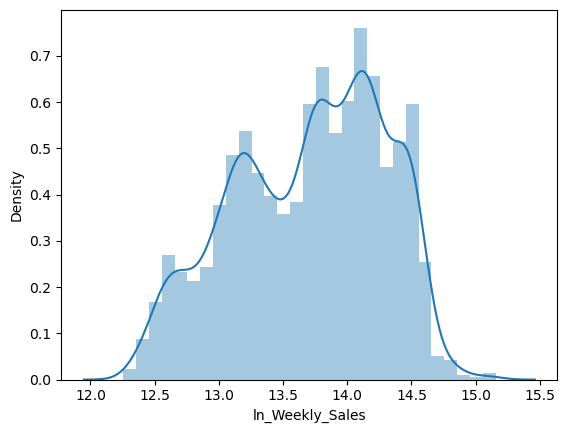

In [80]:
sn.distplot(train.ln_Weekly_Sales)

C:\Users\Admin\AppData\Local\Temp\ipykernel_19884\582071522.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(train.Weekly_Sales)


<Axes: xlabel='Weekly_Sales', ylabel='Density'>

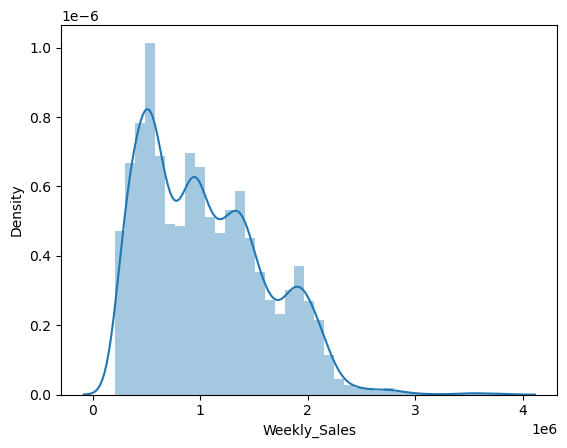

In [81]:
sn.distplot(train.Weekly_Sales)

In [82]:
train = train.drop('Weekly_Sales',axis=1)

In [83]:
train.shape

(6435, 59)

# Correlation of all x variables with ln_Weekly_Sales in Train table

In [84]:
train.corr()

C:\Users\Admin\AppData\Local\Temp\ipykernel_19884\2189804198.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.corr()


,IsHoliday,CPI,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Temperature,Unemployment,...,Store_42,Store_43,Store_44,Store_45,Store_5,Store_6,Store_7,Store_8,Store_9,ln_Weekly_Sales
IsHoliday,1.000000e+00,-0.002162,-0.078347,-0.002902,0.200394,0.256615,0.011059,-0.014865,-0.155091,0.010960,...,-1.099794e-16,-8.063580e-17,-1.108543e-16,-1.155351e-16,-8.222776e-17,-1.095707e-16,-9.850587e-17,-8.094415e-17,-9.832838e-17,0.026770
CPI,-2.162091e-03,1.000000,-0.170642,0.008192,-0.004449,-0.005896,-0.003575,0.065376,0.176888,-0.302020,...,-1.643361e-01,1.385091e-01,-1.643361e-01,5.634055e-02,1.723366e-01,1.761199e-01,8.460630e-02,1.833441e-01,1.840630e-01,-0.077481
Fuel_Price,-7.834652e-02,-0.170642,1.000000,0.289325,0.029477,0.018230,0.162677,0.212811,0.144982,-0.034684,...,7.137864e-02,-4.562490e-02,-2.379986e-02,1.937936e-02,-4.562490e-02,-4.562490e-02,-3.844482e-02,-4.562490e-02,-4.562490e-02,0.018771
MarkDown1,-2.902258e-03,0.008192,0.289325,1.000000,0.177762,-0.011984,0.839299,0.416222,-0.036238,-0.108215,...,-5.924643e-02,-5.937809e-02,-5.775641e-02,1.681333e-02,-3.474716e-02,1.481340e-02,-3.755531e-03,2.495251e-03,-3.292065e-02,0.197685
MarkDown2,2.003943e-01,-0.004449,0.029477,0.177762,1.000000,-0.005098,0.115667,0.133652,-0.178861,-0.042417,...,-2.282168e-02,-2.324701e-02,-2.440732e-02,4.911474e-03,-1.633439e-02,1.299266e-02,-1.168114e-02,-7.852860e-04,-1.681811e-02,0.087138
MarkDown3,2.566148e-01,-0.005896,0.018230,-0.011984,-0.005098,1.000000,-0.010371,0.043639,-0.056318,-0.018575,...,-1.210870e-02,-1.217347e-02,-1.210935e-02,-5.667754e-03,-5.936359e-03,6.199282e-03,-3.458663e-03,-1.919199e-03,-2.884584e-03,0.091789
MarkDown4,1.105934e-02,-0.003575,0.162677,0.839299,0.115667,-0.010371,1.000000,0.304491,-0.055525,-0.078119,...,-4.029070e-02,-4.024352e-02,-4.041673e-02,7.705224e-03,-2.469358e-02,1.275784e-02,-1.598329e-02,-1.621066e-02,-2.616185e-02,0.149486
MarkDown5,-1.486512e-02,0.065376,0.212811,0.416222,0.133652,0.043639,0.304491,1.000000,-0.020774,-0.122895,...,-4.189835e-02,-4.170364e-02,-4.673923e-02,-5.307730e-03,-2.474313e-02,1.569801e-02,-1.153439e-02,1.742945e-02,-9.597107e-03,0.177459
Temperature,-1.550913e-01,0.176888,0.144982,-0.036238,-0.178861,-0.056318,-0.055525,-0.020774,1.000000,0.101158,...,9.463278e-02,6.713983e-02,-5.694483e-02,-2.348206e-02,7.149202e-02,7.386131e-02,-1.711905e-01,1.512341e-02,5.812795e-02,-0.092519
Unemployment,1.096028e-02,-0.302020,-0.034684,-0.108215,-0.042417,-0.018575,-0.078119,-0.122895,0.101158,1.000000,...,2.924022e-02,1.555711e-01,-1.015515e-01,5.220900e-02,-1.369323e-01,-1.118969e-01,4.714448e-02,-1.532927e-01,-1.526469e-01,-0.079817


In [85]:
train_corr = train.corr().iloc[-1:,:].T

C:\Users\Admin\AppData\Local\Temp\ipykernel_19884\1417911884.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_corr = train.corr().iloc[-1:,:].T


In [86]:
train_corr.to_csv('train_corr.csv')

# Linear regression model for train

In [87]:
train_new = train[['MarkDown1','MarkDown4','MarkDown5','Size','Type_B','Type_C',
                   'Store_10','Store_11','Store_13','Store_14','Store_16','Store_19',
                   'Store_2','Store_20','Store_23','Store_24','Store_27','Store_29',
                   'Store_3','Store_30','Store_31','Store_33','Store_36','Store_37',
                   'Store_38','Store_39','Store_4','Store_42','Store_44',
                   'Store_5','Store_6','Store_7','Store_9','ln_Weekly_Sales']]

In [88]:
train_new.columns= [phrase.strip().replace('.', '_') for phrase in train_new.columns]
train_new.columns

Index(['MarkDown1', 'MarkDown4', 'MarkDown5', 'Size', 'Type_B', 'Type_C',
       'Store_10', 'Store_11', 'Store_13', 'Store_14', 'Store_16', 'Store_19',
       'Store_2', 'Store_20', 'Store_23', 'Store_24', 'Store_27', 'Store_29',
       'Store_3', 'Store_30', 'Store_31', 'Store_33', 'Store_36', 'Store_37',
       'Store_38', 'Store_39', 'Store_4', 'Store_42', 'Store_44', 'Store_5',
       'Store_6', 'Store_7', 'Store_9', 'ln_Weekly_Sales'],
      dtype='object')

In [89]:
all_columns = "+".join(train_new.columns.difference( ['ln_Weekly_Sales'] ))

print (all_columns)

my_formula = "ln_Weekly_Sales~" + all_columns

print (my_formula)

MarkDown1+MarkDown4+MarkDown5+Size+Store_10+Store_11+Store_13+Store_14+Store_16+Store_19+Store_2+Store_20+Store_23+Store_24+Store_27+Store_29+Store_3+Store_30+Store_31+Store_33+Store_36+Store_37+Store_38+Store_39+Store_4+Store_42+Store_44+Store_5+Store_6+Store_7+Store_9+Type_B+Type_C
ln_Weekly_Sales~MarkDown1+MarkDown4+MarkDown5+Size+Store_10+Store_11+Store_13+Store_14+Store_16+Store_19+Store_2+Store_20+Store_23+Store_24+Store_27+Store_29+Store_3+Store_30+Store_31+Store_33+Store_36+Store_37+Store_38+Store_39+Store_4+Store_42+Store_44+Store_5+Store_6+Store_7+Store_9+Type_B+Type_C


In [90]:
import statsmodels.formula.api as smf
lm=smf.ols(formula=my_formula, data=train_new).fit()

In [91]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        ln_Weekly_Sales   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     2342.
Date:                Sat, 28 Sep 2024   Prob (F-statistic):               0.00
Time:                        18:55:14   Log-Likelihood:                 2554.0
No. Observations:                6435   AIC:                            -5040.
Df Residuals:                    6401   BIC:                            -4810.
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.7877      0.031    441.021      0.000      13.726      13.849
MarkDown1   1.558e-07   6.79e-07      0.229      0.819   -1.17e-06    1.49e-06
MarkDown4   2.269e-07      1e-06      0.226      0.821   -1.74e-06    2.19e-06
MarkDown5   3.525e-06   5.62e-07      6.273      0.000    2.42e-06    4.63e-06
Size         7.75e-07   1.79e-07      4.321      0.000    4.23e-07    1.13e-06
Store_10       0.7924      0.014     54.769      0.000       0.764       0.821
Store_11       0.1578      0.016      9.993      0.000       0.127       0.189
Store_13       0.5355      0.017     31.909      0.000       0.503       0.568
Store_14       0.5567      0.015     36.223      0.000       0.527       0.587
Store_16      -0.4491      0.018    -24.924      0.000      -0.484      -0.414
Store_19       0.2234      0.016     14.377      0.000       0.193       0.254
Store_2        0.5111      0.015     33.089      0.000       0.481       0.541
Store_20       0.5999      0.016     38.608      0.000       0.569       0.630
Store_23       0.4880      0.014     33.896      0.000       0.460       0.516
Store_24       0.1609      0.016     10.354      0.000       0.130       0.191
Store_27       0.4272      0.016     27.432      0.000       0.397       0.458
Store_29      -0.4397      0.015    -29.277      0.000      -0.469      -0.410
Store_3       -0.6801      0.020    -33.410      0.000      -0.720      -0.640
Store_30      -0.3691      0.019    -19.128      0.000      -0.407      -0.331
Store_31       0.1894      0.016     12.189      0.000       0.159       0.220
Store_33      -1.3568      0.028    -48.755      0.000      -1.411      -1.302
Store_36      -1.0028      0.028    -36.076      0.000      -1.057      -0.948
Store_37      -0.1974      0.019    -10.230      0.000      -0.235      -0.160
Store_38      -0.4991      0.019    -25.867      0.000      -0.537      -0.461
Store_39       0.2232      0.015     15.006      0.000       0.194       0.252
Store_4        0.5916      0.016     37.728      0.000       0.561       0.622
Store_42      -0.1304      0.019     -6.759      0.000      -0.168      -0.093
Store_44      -0.7379      0.019    -38.245      0.000      -0.776      -0.700
Store_5       -0.9160      0.021    -44.290      0.000      -0.957      -0.875
Store_6        0.3030      0.015     19.609      0.000       0.273       0.333
Store_7       -0.3721      0.017    -22.321      0.000      -0.405      -0.339
Store_9       -0.4519      0.014    -31.223      0.000      -0.480      -0.424
Type_B        -0.2384      0.012    -20.178      0.000      -0.262      -0.215
Type_C        -0.4644      0.028    -16.814      0.000      -0.519      -0.410
==============================================================================
Omnibus:                      828.460   Durbin-Watson:                   0.586
Pr

In [92]:
import statsmodels as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

# VIF calculation for train

In [93]:
%%capture
#gather features
#features = "+".join(df_cc_feature.columns - ["lntotal_spent"])

# get y and X dataframes based on this regression
y, X = dmatrices('ln_Weekly_Sales~MarkDown1+MarkDown4+MarkDown5+Size+Store_10+Store_11+Store_13+Store_14+Store_16+Store_19+Store_2+Store_20+Store_23+Store_24+Store_27+Store_29+Store_3+Store_30+Store_31+Store_33+Store_36+Store_37+Store_38+Store_39+Store_4+Store_42+Store_44+Store_5+Store_6+Store_7+Store_9+Type_B+Type_C',train_new, return_type='dataframe')

In [94]:
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [95]:
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [96]:
 vif.round(1)

,VIF Factor,features
0,236.3,Intercept
1,3.8,MarkDown1
2,3.4,MarkDown4
3,1.3,MarkDown5
4,31.0,Size
5,1.1,Store_10
6,1.3,Store_11
7,1.5,Store_13
8,1.2,Store_14
9,1.7,Store_16


In [97]:
all_columns1 = "+".join(train_new.columns.difference( ['Size','Type_C','ln_Weekly_Sales'] ))

print (all_columns1)

my_formula = "ln_Weekly_Sales~" + all_columns1 + "-1"

print (my_formula)

MarkDown1+MarkDown4+MarkDown5+Store_10+Store_11+Store_13+Store_14+Store_16+Store_19+Store_2+Store_20+Store_23+Store_24+Store_27+Store_29+Store_3+Store_30+Store_31+Store_33+Store_36+Store_37+Store_38+Store_39+Store_4+Store_42+Store_44+Store_5+Store_6+Store_7+Store_9+Type_B
ln_Weekly_Sales~MarkDown1+MarkDown4+MarkDown5+Store_10+Store_11+Store_13+Store_14+Store_16+Store_19+Store_2+Store_20+Store_23+Store_24+Store_27+Store_29+Store_3+Store_30+Store_31+Store_33+Store_36+Store_37+Store_38+Store_39+Store_4+Store_42+Store_44+Store_5+Store_6+Store_7+Store_9+Type_B-1


In [98]:
import statsmodels.formula.api as smf
lm=smf.ols(formula=my_formula, data=train_new).fit()

In [99]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        ln_Weekly_Sales   R-squared (uncentered):                   0.806
Model:                            OLS   Adj. R-squared (uncentered):              0.805
Method:                 Least Squares   F-statistic:                              858.0
Date:                Sat, 28 Sep 2024   Prob (F-statistic):                        0.00
Time:                        18:55:20   Log-Likelihood:                         -20705.
No. Observations:                6435   AIC:                                  4.147e+04
Df Residuals:                    6404   BIC:                                  4.168e+04
Df Model:                          31                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
MarkDown1      0.0002    2.5e-05      9.924      0.000       0.000       0.000
MarkDown4     -0.0002   3.72e-05     -5.208      0.000      -0.000      -0.000
MarkDown5      0.0002   2.07e-05      8.734      0.000       0.000       0.000
Store_10       0.6650      0.534      1.245      0.213      -0.382       1.712
Store_11      13.2153      0.509     25.978      0.000      12.218      14.213
Store_13      13.3968      0.510     26.271      0.000      12.397      14.396
Store_14      13.4013      0.510     26.271      0.000      12.401      14.401
Store_16      -0.1585      0.534     -0.297      0.767      -1.206       0.889
Store_19      13.2463      0.509     26.022      0.000      12.248      14.244
Store_2       13.4268      0.510     26.352      0.000      12.428      14.426
Store_20      13.5427      0.510     26.580      0.000      12.544      14.542
Store_23       0.6483      0.534      1.214      0.225      -0.399       1.695
Store_24      13.1614      0.509     25.847      0.000      12.163      14.160
Store_27      13.3194      0.510     26.119      0.000      12.320      14.319
Store_29      -0.2273      0.534     -0.426      0.670      -1.274       0.820
Store_3       -0.2645      0.535     -0.495      0.621      -1.312       0.783
Store_30      12.8292      0.507     25.324      0.000      11.836      13.822
Store_31      13.0325      0.510     25.554      0.000      12.033      14.032
Store_33      12.3270      0.507     24.335      0.000      11.334      13.320
Store_36      12.7029      0.507     25.079      0.000      11.710      13.696
Store_37      13.0436      0.507     25.751      0.000      12.051      14.037
Store_38      12.7203      0.507     25.112      0.000      11.727      13.713
Store_39      12.4390      0.522     23.823      0.000      11.415      13.463
Store_4       13.6374      0.509     26.785      0.000      12.639      14.635
Store_42      13.1159      0.506     25.895      0.000      12.123      14.109
Store_44      12.5169      0.506     24.714      0.000      11.524      13.510
Store_5       -0.5628      0.534     -1.053      0.292      -1.611       0.485
Store_6       13.4034      0.509     26.359      0.000      12.407      14.400
Store_7       -0.3118      0.534     -0.584      0.559      -1.359       0.735
Store_9       -0.1260      0.535     -0.236      0.814      -1.174       0.922
Type_B        12.8715      0.174     73.880      0.000      12.530      13.213
==============================================================================
Omnibus:                     1121.908   Durbin-Watson:                   0.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1815.142
Skew:                           1.292   Prob(JB):            

In [100]:
all_columns2 = "+".join(train_new.columns.difference( ['Size','Type_C','Store_10','Store_16','Store_23',
                                                       'Store_29','Store_3','Store_5','Store_7',
                                                       'Store_9','ln_Weekly_Sales'] ))

print (all_columns2)

my_formula = "ln_Weekly_Sales~" + all_columns2 + "-1"

print (my_formula)

MarkDown1+MarkDown4+MarkDown5+Store_11+Store_13+Store_14+Store_19+Store_2+Store_20+Store_24+Store_27+Store_30+Store_31+Store_33+Store_36+Store_37+Store_38+Store_39+Store_4+Store_42+Store_44+Store_6+Type_B
ln_Weekly_Sales~MarkDown1+MarkDown4+MarkDown5+Store_11+Store_13+Store_14+Store_19+Store_2+Store_20+Store_24+Store_27+Store_30+Store_31+Store_33+Store_36+Store_37+Store_38+Store_39+Store_4+Store_42+Store_44+Store_6+Type_B-1


In [101]:
import statsmodels.formula.api as smf
lm=smf.ols(formula=my_formula, data=train_new).fit()

In [102]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        ln_Weekly_Sales   R-squared (uncentered):                   0.806
Model:                            OLS   Adj. R-squared (uncentered):              0.805
Method:                 Least Squares   F-statistic:                              1157.
Date:                Sat, 28 Sep 2024   Prob (F-statistic):                        0.00
Time:                        18:55:21   Log-Likelihood:                         -20708.
No. Observations:                6435   AIC:                                  4.146e+04
Df Residuals:                    6412   BIC:                                  4.162e+04
Df Model:                          23                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
MarkDown1      0.0002   2.49e-05      9.966      0.000       0.000       0.000
MarkDown4     -0.0002   3.71e-05     -5.173      0.000      -0.000      -0.000
MarkDown5      0.0002   2.07e-05      8.771      0.000       0.000       0.000
Store_11      13.2104      0.509     25.974      0.000      12.213      14.207
Store_13      13.3902      0.510     26.264      0.000      12.391      14.390
Store_14      13.3953      0.510     26.265      0.000      12.396      14.395
Store_19      13.2404      0.509     26.016      0.000      12.243      14.238
Store_2       13.4206      0.509     26.346      0.000      12.422      14.419
Store_20      13.5362      0.509     26.574      0.000      12.538      14.535
Store_24      13.1554      0.509     25.842      0.000      12.157      14.153
Store_27      13.3124      0.510     26.111      0.000      12.313      14.312
Store_30      12.8287      0.507     25.328      0.000      11.836      13.822
Store_31      13.0270      0.510     25.549      0.000      12.027      14.026
Store_33      12.3265      0.506     24.339      0.000      11.334      13.319
Store_36      12.7025      0.506     25.083      0.000      11.710      13.695
Store_37      13.0432      0.506     25.756      0.000      12.050      14.036
Store_38      12.7199      0.506     25.116      0.000      11.727      13.713
Store_39      12.4310      0.522     23.814      0.000      11.408      13.454
Store_4       13.6312      0.509     26.779      0.000      12.633      14.629
Store_42      13.1155      0.506     25.900      0.000      12.123      14.108
Store_44      12.5166      0.506     24.718      0.000      11.524      13.509
Store_6       13.3984      0.508     26.354      0.000      12.402      14.395
Type_B        12.8478      0.128    100.381      0.000      12.597      13.099
==============================================================================
Omnibus:                     1114.909   Durbin-Watson:                   0.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1798.981
Skew:                           1.286   Prob(JB):                         0.00
Kurtosis:                       3.303   Cond. No.                     5.52e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 5.52e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [103]:
train_x = train_new[train_new.columns.difference( ['Size','Type_C','Store_10','Store_16','Store_23',
                                                       'Store_29','Store_3','Store_5','Store_7',
                                                       'Store_9','ln_Weekly_Sales'])]

In [104]:
train_y = train_new[['ln_Weekly_Sales']]

# Y prediction for test 

In [105]:
test_x = test[['MarkDown1','MarkDown4','MarkDown5','Type_B',
                   'Store_11','Store_13','Store_14','Store_19',
                   'Store_2','Store_20','Store_24','Store_27',
                   'Store_30','Store_31','Store_33','Store_36','Store_37',
                   'Store_38','Store_39','Store_4','Store_42','Store_44',
                   'Store_6']]

In [106]:
test_x.shape

(1755, 23)

In [107]:
test_y = lm.predict(test_x)

In [108]:
test_y.head()

0    1.479470
1    3.063634
2    3.393456
3    0.234352
4    1.848422
dtype: float64

In [109]:
from sklearn import metrics

In [110]:
y_pred_t = lm.predict(train_x)
rmse_t = np.sqrt( metrics.mean_squared_error(train_y, y_pred_t) )
print(rmse_t)
print (metrics.r2_score(train_y,y_pred_t ))

6.043952420607503
-104.56241312091458


In [111]:
test_y = np.exp(test_y)

In [112]:
test = pd.concat([test_x,test_y],axis=1)

In [113]:
test.head()

,MarkDown1,MarkDown4,MarkDown5,Type_B,Store_11,Store_13,Store_14,Store_19,Store_2,Store_20,...,Store_33,Store_36,Store_37,Store_38,Store_39,Store_4,Store_42,Store_44,Store_6,0
0,6766.44,3639.90,2737.42,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.390619
1,11421.32,4646.79,6154.16,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,21.405192
2,9696.28,1133.15,6612.69,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,29.768643
3,883.59,209.91,303.32,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.264089
4,2460.03,150.57,6966.34,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6.349790


In [114]:
test_y

0         4.390619e+00
1         2.140519e+01
2         2.976864e+01
3         1.264089e+00
4         6.349790e+00
              ...     
112472    1.406134e+06
112473    1.572251e+06
112474    1.248236e+06
112475    8.967140e+05
112476    5.608832e+05
Length: 1755, dtype: float64